In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [80]:
os.listdir()

['.ipynb_checkpoints',
 '.virtual_documents',
 'First Task.pdf',
 'Task 1.csv',
 'Task 1.ipynb']

In [81]:
data=pd.read_csv("Task 1.csv")

In [82]:
data.shape

(36285, 17)

In [83]:
data.isna().sum().sum()

0

In [84]:
data.duplicated().sum()

0

In [85]:
data.shape

(36285, 17)

In [86]:
data.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [87]:
cat_feats=data.select_dtypes('object').columns
num_feats=[col for col in data.columns if col not in cat_feats]

In [88]:
len(cat_feats)+len(num_feats)

17

In [89]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [90]:
data['number of adults'].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [91]:
group=data.groupby(['number of adults','booking status']).size().unstack()

In [92]:
len(data['number of adults'].unique())

5

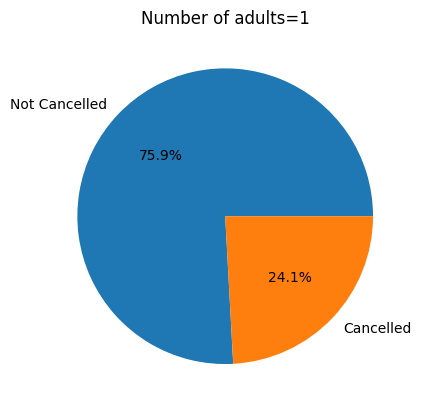

<Figure size 2000x1000 with 0 Axes>

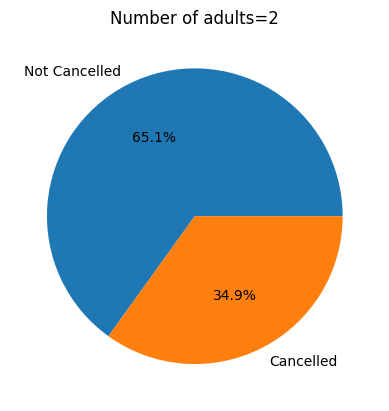

<Figure size 2000x1000 with 0 Axes>

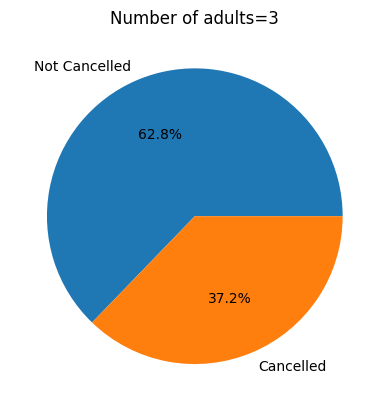

<Figure size 2000x1000 with 0 Axes>

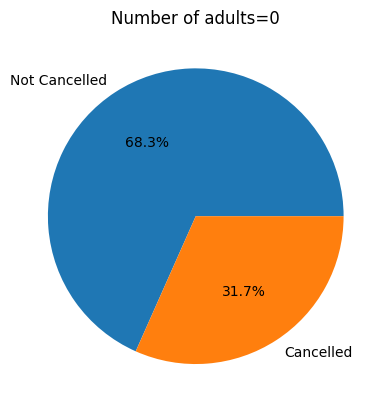

<Figure size 2000x1000 with 0 Axes>

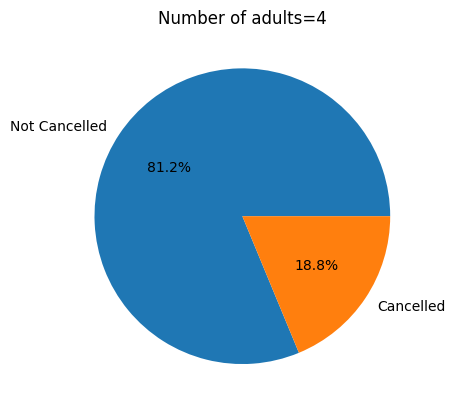

<Figure size 2000x1000 with 0 Axes>

In [93]:
for i,u in enumerate(data['number of adults'].unique()):  
    plt.pie(data[data['number of adults']==u]['booking status'].value_counts(),autopct='%2.1f%%',labels=['Not Cancelled','Cancelled'])
    plt.title(f'Number of adults={u}')
    plt.figure(figsize=(20,10))
    
    plt.show()
    
    

In [94]:
data['booking status']=data['booking status'].replace({'Canceled':1,'Not_Canceled':0})

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_7680\1687291017.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['booking status']=data['booking status'].replace({'Canceled':1,'Not_Canceled':0})


In [95]:
threshold=data.shape[0]*0.01

In [96]:
threshold

362.85

In [172]:
def display_bar_cat(feat):
    threshold=data.shape[0]*0.01
    data.groupby(feat)['booking status'].mean()[data.groupby(feat).size()>threshold].plot.bar()
    plt.title('Probability Of Cancelling the Booking')
    plt.show()
    try:
        print(f'Not enough data for {str(list(data.groupby(feat).size()[(data.groupby(feat).size()<=threshold)].index))}')
    except:
        print(feat)


In [98]:
data.groupby('booking status')['number of adults'].size()

booking status
0    24396
1    11889
Name: number of adults, dtype: int64

In [99]:
data.groupby('number of adults')['booking status'].mean()[data.groupby('number of adults').size()>700]

number of adults
1    0.241366
2    0.349291
3    0.372304
Name: booking status, dtype: float64

In [100]:
data.groupby('number of adults').size()[(data.groupby('number of adults').size()<=500)].index

Index([0, 4], dtype='int64', name='number of adults')

In [101]:
data['number of adults']

0        1
1        1
2        2
3        1
4        1
        ..
36280    2
36281    2
36282    2
36283    3
36284    2
Name: number of adults, Length: 36285, dtype: int64

In [102]:
data.loc[data['P-C']>0,'P-C']=1

In [103]:
data['P-C'].value_counts()

P-C
0    35947
1      338
Name: count, dtype: int64

In [104]:
cat_nums=[]
cont_nums=[]
for col in num_feats:
    if ((len(data[col].unique()))<18):
        cat_nums.append(col)
    else:
        cont_nums.append(col)


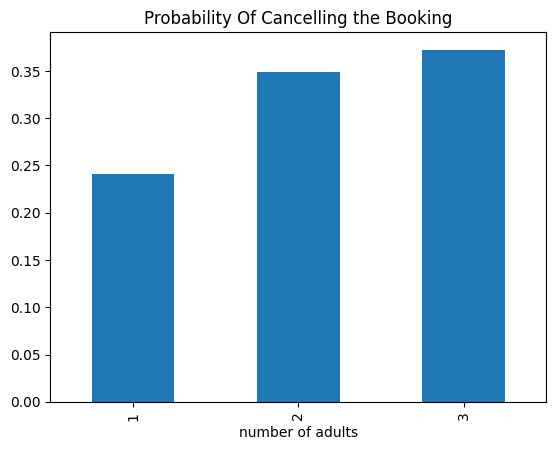

Not enough data for [0, 4]


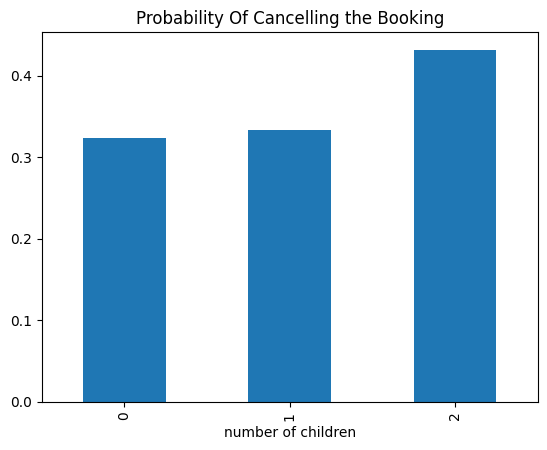

Not enough data for [3, 9, 10]


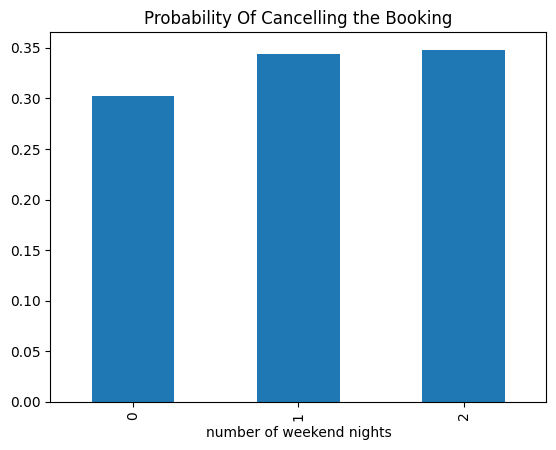

Not enough data for [3, 4, 5, 6, 7]


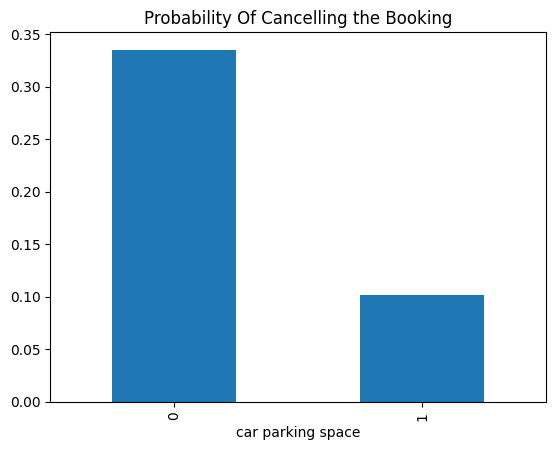

Not enough data for []


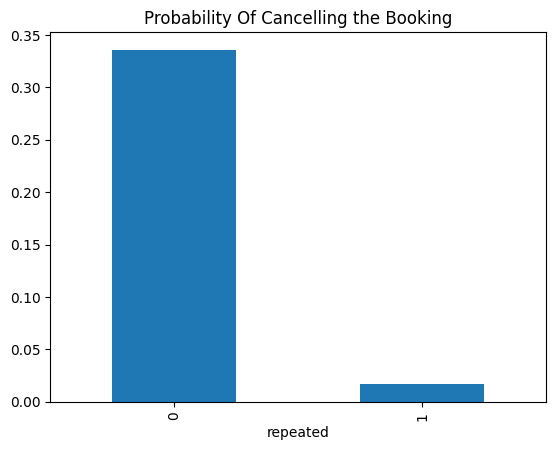

Not enough data for []


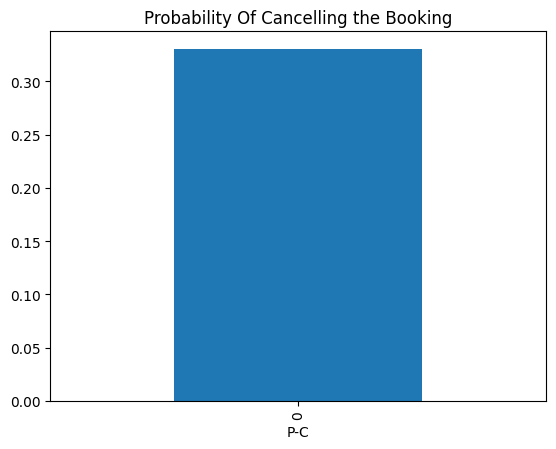

Not enough data for [1]


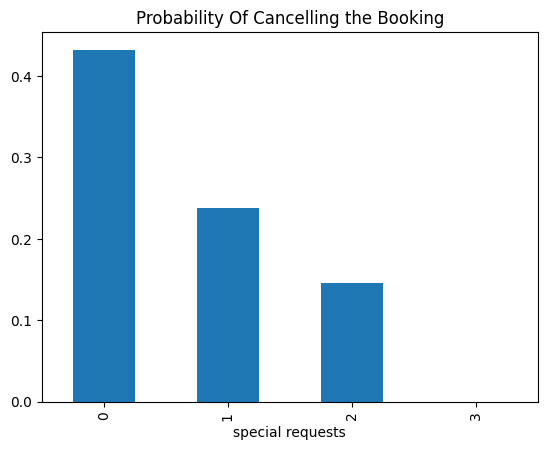

Not enough data for [4, 5]


In [173]:
for col in cat_nums:
    display_bar_cat(col)

In [175]:
data['car parking space'].unique()

array([0, 1], dtype=int64)

In [106]:
data['P-C'].value_counts()

P-C
0    35947
1      338
Name: count, dtype: int64

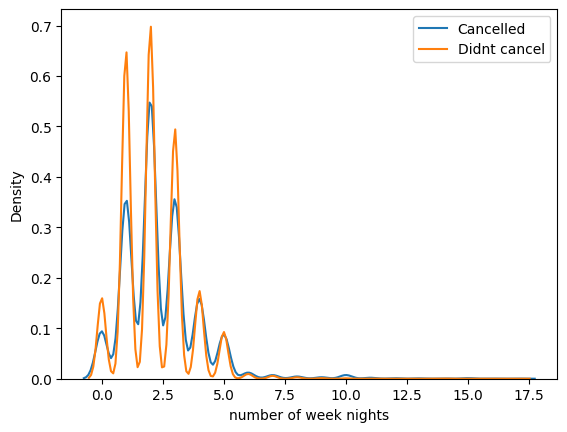

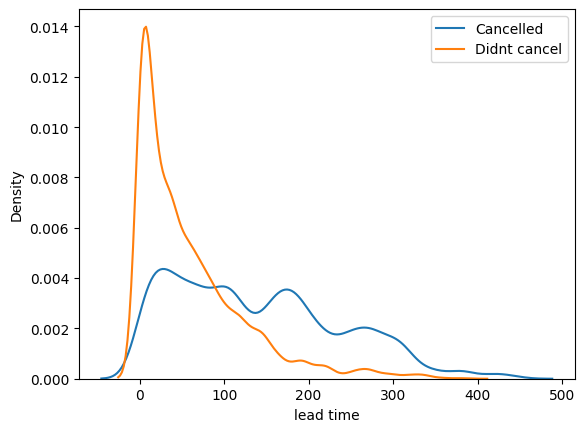

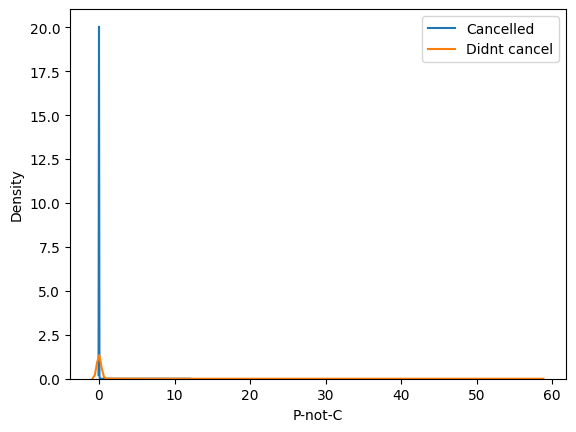

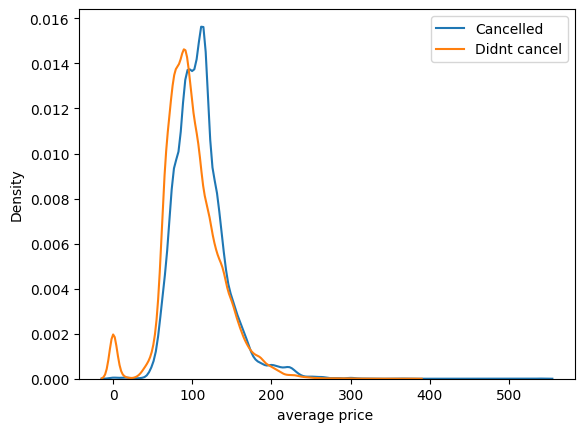

In [107]:
for col in cont_nums:
    sns.kdeplot(data[data['booking status']==1][col],label='Cancelled')
    sns.kdeplot(data[data['booking status']==0][col],label='Didnt cancel')
    plt.legend()
    plt.show()

In [108]:
cat_feats=list(cat_feats)
cat_feats.remove('date of reservation')
time_feat='date of reservation'

In [109]:
cat_feats.remove('Booking_ID')


In [110]:
cat_feats.remove('booking status')

In [111]:
for col in cat_feats:
    print(col,len(data[col].unique()))

type of meal 4
room type 7
market segment type 5


In [112]:
for col in cat_feats:
    print(data[col].value_counts())

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


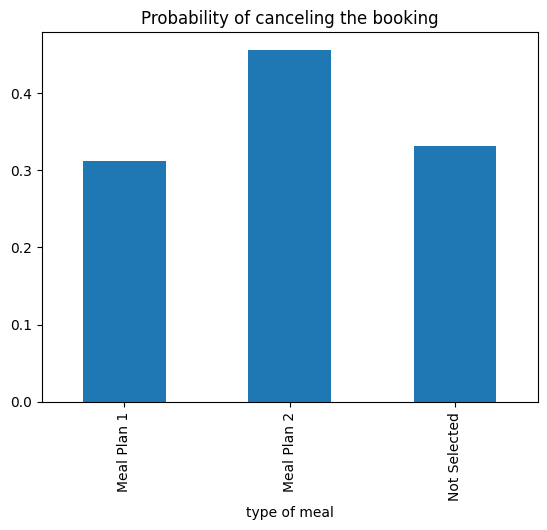

Not enough data for ['Meal Plan 3']


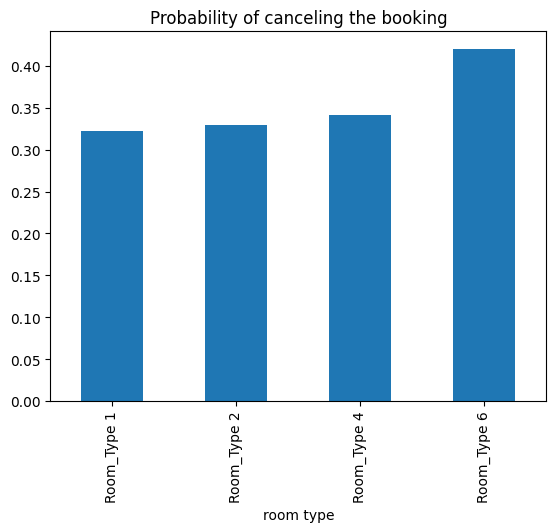

Not enough data for ['Room_Type 3', 'Room_Type 5', 'Room_Type 7']


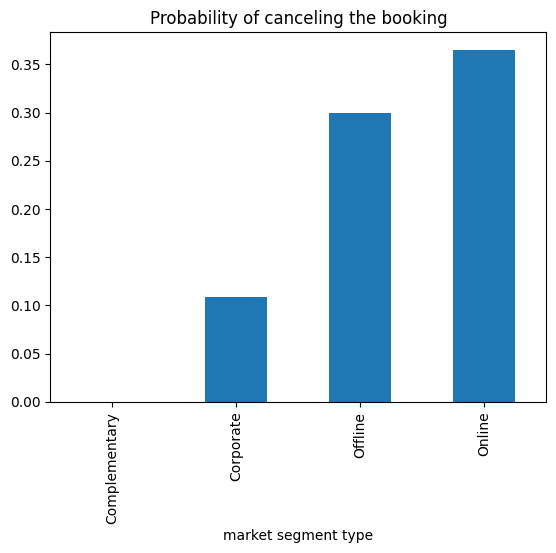

Not enough data for ['Aviation']


In [176]:
for col in cat_feats:
    (data.groupby(col)['booking status'].mean())[(data.groupby(col)['booking status'].size()>=300)].plot.bar()
    string=str(list(((data.groupby(col)['booking status'].mean())[(data.groupby(col)['booking status'].size()<300)].index)))
    plt.title('Probability of canceling the booking')
    plt.show()
    print(f'Not enough data for {string}')

In [114]:
len(data['date of reservation'].unique())

553

In [115]:
data['month of reservation']=(data['date of reservation'].str.split('[/-]')).apply(lambda x:x[0])
data['day of reservation']=(data['date of reservation'].str.split('[/-]')).apply(lambda x:x[1])
data['year of reservation']=(data['date of reservation'].str.split('[/-]')).apply(lambda x:x[2])

In [116]:
data.loc[data['year of reservation']=='29'].head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month of reservation,day of reservation,year of reservation
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,Online,1,1,0,61.43,0,2018-2-29,1,2018,2,29
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,Online,0,0,0,102.05,0,2018-2-29,1,2018,2,29
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,Offline,0,0,0,45.50,0,2018-2-29,0,2018,2,29


In [117]:
data.loc[data['year of reservation']=='29','year of reservation'].index

Index([ 2626,  3677,  5600,  6343,  7648,  8000,  8989,  9153,  9245,  9664,
        9934, 10593, 10652, 10747, 11881, 13958, 14304, 15363, 15438, 17202,
       18380, 18534, 18680, 19013, 20419, 21674, 21688, 26108, 27559, 27928,
       30552, 30616, 30632, 30839, 32041, 34638, 35481],
      dtype='int64')

In [118]:
indecies=data.loc[data['year of reservation']=='29','year of reservation'].index
temp_year=data.loc[data['year of reservation']=='29','year of reservation']
data.loc[indecies,'year of reservation']=data.loc[data['year of reservation']=='29','month of reservation']


In [119]:
data.loc[indecies,'month of reservation']=data.loc[indecies,'day of reservation']

In [120]:
data.loc[indecies,'day of reservation']=temp_year

In [121]:
data.iloc[[2626,3677,5600]]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month of reservation,day of reservation,year of reservation
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,Online,1,1,0,61.43,0,2018-2-29,1,2,29,2018
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,Online,0,0,0,102.05,0,2018-2-29,1,2,29,2018
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,Offline,0,0,0,45.50,0,2018-2-29,0,2,29,2018


In [122]:
data['year of reservation'].unique()

array(['2015', '2018', '2017', '2016'], dtype=object)

In [123]:
data['year of reservation'].value_counts()

year of reservation
2018    29767
2017     6516
2015        1
2016        1
Name: count, dtype: int64

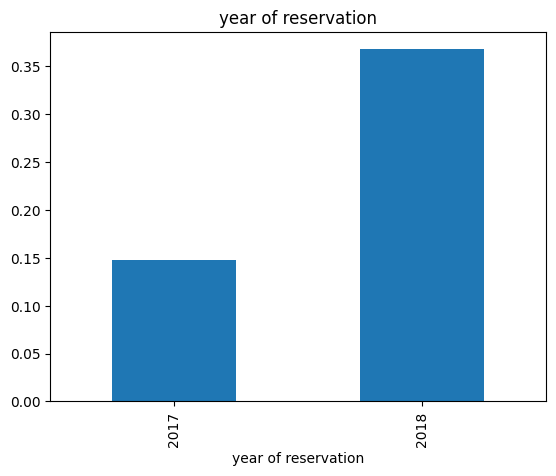

Not enough data for ['2015', '2016']


In [124]:
(data.groupby('year of reservation')['booking status'].mean())[(data.groupby('year of reservation')['booking status'].size()>=300)].plot.bar()
string=str(list(((data.groupby('year of reservation')['booking status'].mean())[(data.groupby('year of reservation')['booking status'].size()<300)].index)))
plt.title('year of reservation')
plt.show()
print(f'Not enough data for {string}')

In [125]:
data.head(4)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month of reservation,day of reservation,year of reservation
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,0,10,2,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,0,11,6,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,1,2,28,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,1,5,20,2017


In [126]:
data.drop('date of reservation',axis=1,inplace=True)

In [127]:
data.groupby('booking status')['average price '].median()

booking status
0     95.0
1    108.0
Name: average price , dtype: float64

<Axes: xlabel='booking status'>

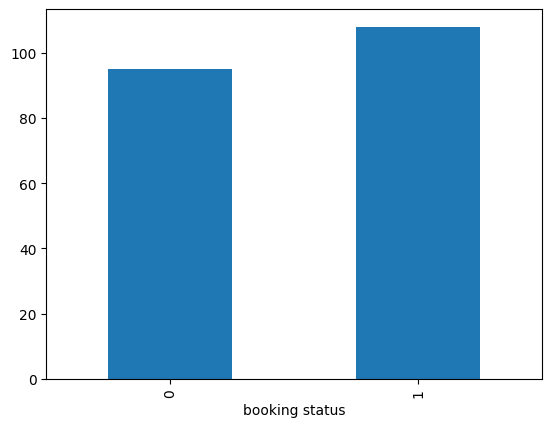

In [128]:
data.groupby('booking status')['average price '].median().plot.bar()

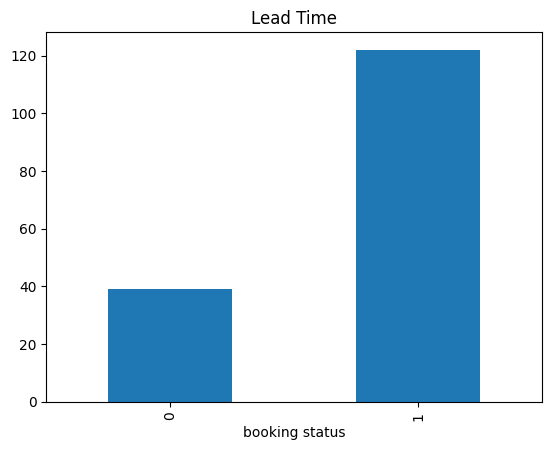

In [129]:
data.groupby('booking status')['lead time'].median().plot.bar()
plt.title("Lead Time")
plt.show()

In [130]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month of reservation,day of reservation,year of reservation
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,0,10,2,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,11,6,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,1,2,28,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,1,5,20,2017
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,1,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,1,9,13,2018
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,0,10,15,2017
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,0,12,26,2018
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,0,7,6,2018


In [131]:
def returnquarter(s):
    if s<=3:
        return 'First quarter'
    if s<=6:
        return 'Second quarter'
    if s<=9:
        return 'Third quarter'
    if s<=12:
        return 'Fourth quarter'

In [132]:
data['quarter of the year']=data['month of reservation'].astype(int).apply(returnquarter)

In [133]:
data['quarter of the year']

0        Fourth quarter
1        Fourth quarter
2         First quarter
3        Second quarter
4        Second quarter
              ...      
36280     Third quarter
36281    Fourth quarter
36282    Fourth quarter
36283     Third quarter
36284    Fourth quarter
Name: quarter of the year, Length: 36285, dtype: object

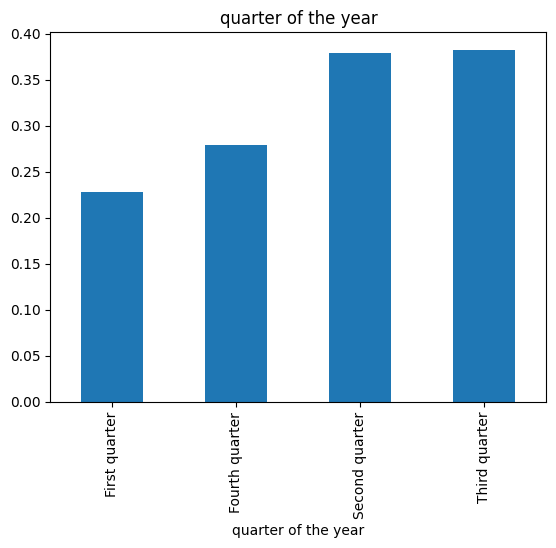

Not enough data for []


In [134]:
(data.groupby('quarter of the year')['booking status'].mean())[(data.groupby('quarter of the year')['booking status'].size()>=300)].plot.bar()
string=str(list(((data.groupby('quarter of the year')['booking status'].mean())[(data.groupby('quarter of the year')['booking status'].size()<300)].index)))
plt.title('quarter of the year')
plt.show()
print(f'Not enough data for {string}')

In [135]:
data.corr(numeric_only=True)['booking status']

number of adults            0.086774
number of children          0.033007
number of weekend nights    0.061489
number of week nights       0.092824
car parking space          -0.086179
lead time                   0.438491
repeated                   -0.107277
P-C                        -0.057913
P-not-C                    -0.060174
average price               0.142433
special requests           -0.253092
booking status              1.000000
Name: booking status, dtype: float64

In [136]:
data['Total_Number_Of_Guests']=data['number of adults']+data['number of children']

In [137]:
data['Total_Number_Of_Guests'].value_counts()

Total_Number_Of_Guests
2     23946
1      7556
3      3853
4       912
5        15
12        1
10        1
11        1
Name: count, dtype: int64

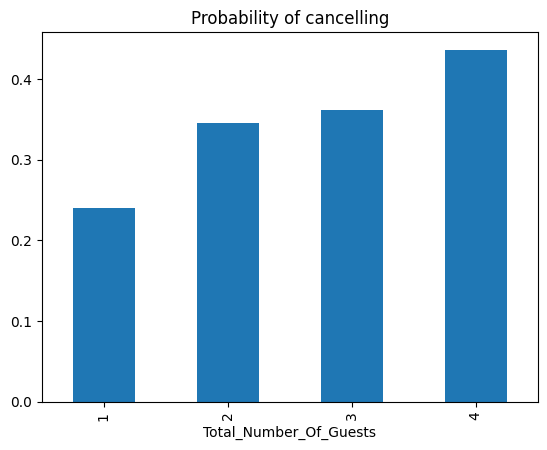

Not enough data for [5, 10, 11, 12]


In [177]:
(data.groupby('Total_Number_Of_Guests')['booking status'].mean())[(data.groupby('Total_Number_Of_Guests')['booking status'].size()>=300)].plot.bar()
string=str(list(((data.groupby('Total_Number_Of_Guests')['booking status'].mean())[(data.groupby('Total_Number_Of_Guests')['booking status'].size()<300)].index)))
plt.title('Probability of cancelling')
plt.show()
print(f'Not enough data for {string}')

In [139]:
data['month of reservation']=data['month of reservation'].astype(int)
data['day of reservation']=data['day of reservation'].astype(int)
data['year of reservation']=data['year of reservation'].astype(int)
cats=list(data.select_dtypes("O").columns)

In [140]:
cats.append("booking status")

In [180]:
data.

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,booking status,month of reservation,day of reservation,year of reservation,quarter of the year,Total_Number_Of_Guests
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,0,10,2,2015,Fourth quarter,2
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,0,11,6,2018,Fourth quarter,1
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,1,2,28,2018,First quarter,3
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,1,5,20,2017,Second quarter,1
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,1,4,11,2018,Second quarter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,...,0,0,115.00,1,1,9,13,2018,Third quarter,2
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,...,0,0,107.55,1,0,10,15,2017,Fourth quarter,2
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,...,0,0,105.61,1,0,12,26,2018,Fourth quarter,2
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,...,0,0,96.90,1,0,7,6,2018,Third quarter,3


<Axes: >

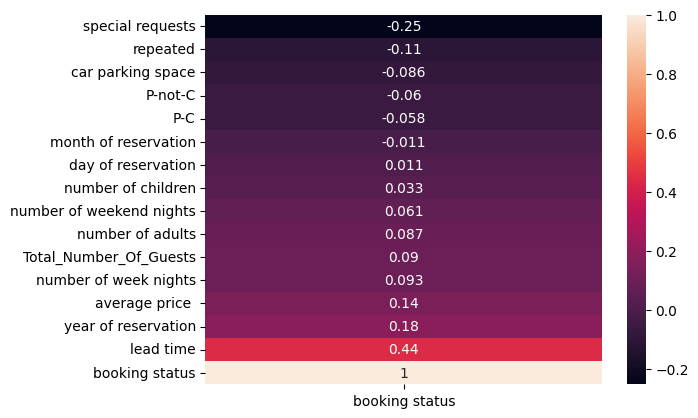

In [161]:
sns.heatmap(data.corr(numeric_only=True)[['booking status']].sort_values(by='booking status'),annot=True)

In [162]:
dat=pd.read_csv("Task 1.csv")

In [167]:
perc_canc=dat['booking status'].value_counts()/(dat.shape[0])

<Axes: ylabel='count'>

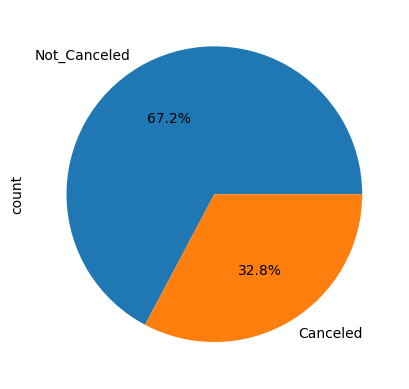

In [170]:
perc_canc.plot.pie(autopct='%2.1f%%')

In [171]:
data.shape

(36285, 21)